# Admission Prediction using Ensemble Machine Learning Models

The dataset contains several parameters which are used to predict whether the students application will be choosen for Masters Programs.
The parameters included are :

    GRE Scores ( out of 340 )
    TOEFL Scores ( out of 120 )
    University Rating ( out of 5 )
    Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
    Undergraduate GPA ( out of 10 )
    Research Experience ( either 0 or 1)
    Chance of Admit ( ranging from 0 to 1)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
ad = pd.read_csv("/Users/barnalikkapradhan/Downloads/ad.csv")
ad

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [3]:
ad.drop(['Serial No.'],axis = 1,inplace= True)

In [4]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [5]:
ad.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
#the gaps in columns have to be removed
ad.columns =[i.strip() for i in ad.columns]
ad.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [7]:
ad.shape

(500, 8)

In [8]:
ad.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [9]:
ad.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [10]:
#check duplicated values
ad[ad.duplicated()]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


In [11]:
numerical_col = [fea for fea in ad.columns if ad[fea].dtype !='O']
print("Numerical columns --",numerical_col)

Numerical columns -- ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance of Admit']


# EDA

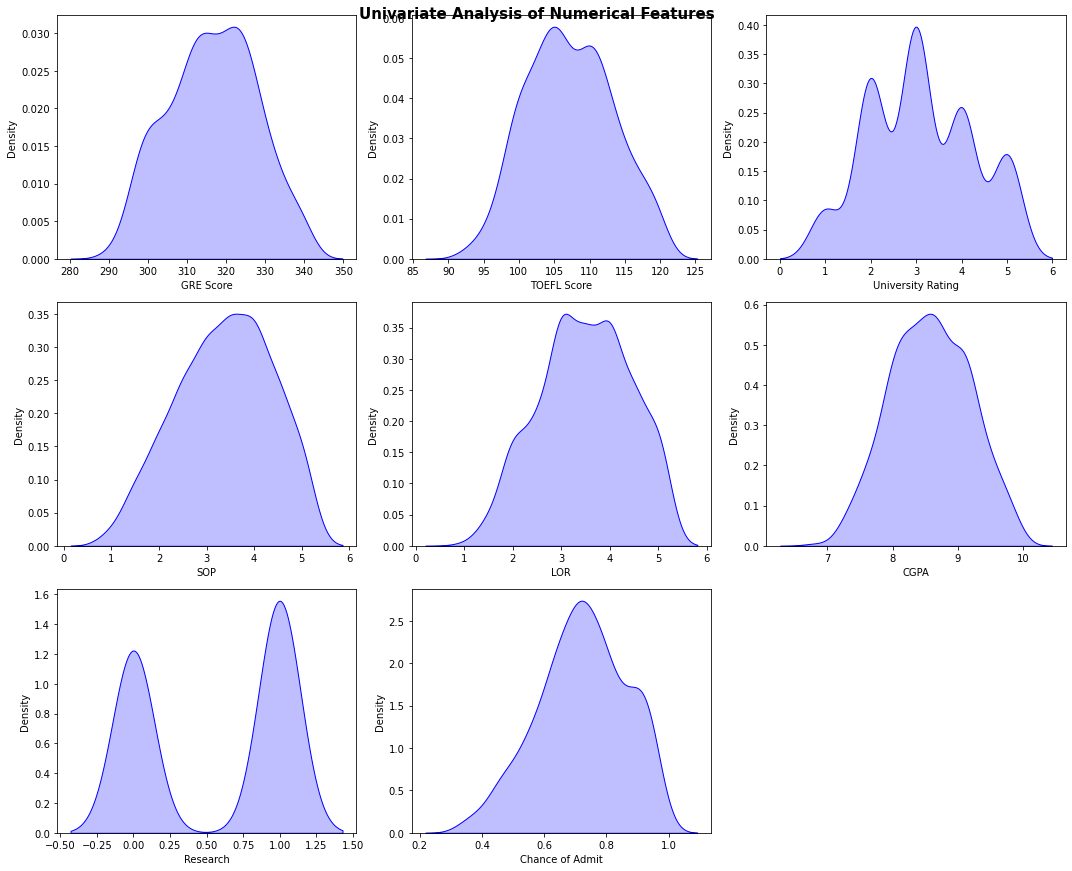

In [12]:
plt.figure(figsize=(15,20), facecolor='white')
plt.suptitle('Univariate Analysis of Numerical Features',fontsize=15,fontweight='bold')
for i in range(0, len(numerical_col)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=ad[numerical_col[i]],shade=True, color='b',data=ad) 
    plt.xlabel(numerical_col[i])
    plt.tight_layout()

In [13]:
# putting the GRE SCORE into score bins for better visulaisation.
def GRE_score(X):
    if X in range(290,299):
        return '290-299'
    elif X in range(299,310):
        return '299-310'
    elif X in range(310,320):
        return '310-320'
    elif X in range(320,330):
        return '320-330'
    else:
        return '330-340'

In [14]:
ad['GRE']=ad['GRE Score'].apply(GRE_score)

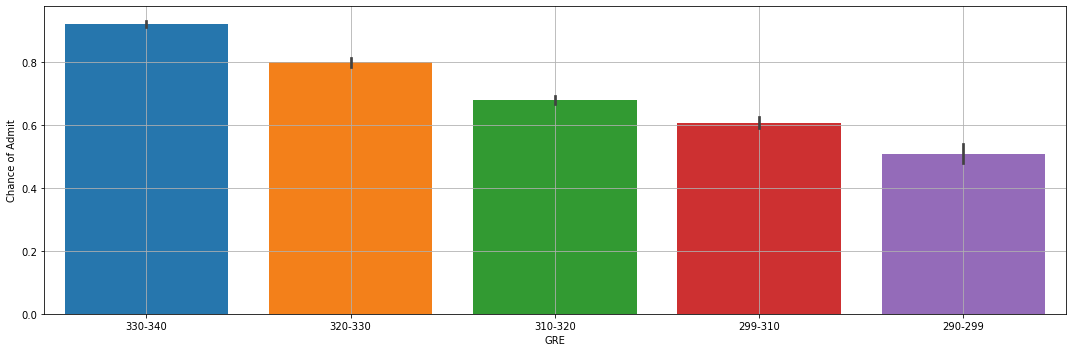

In [15]:
#The students who have scored 330 and above out of 340 have more chances of admission to the Masters program.
plt.figure(figsize=(15,5))
sns.barplot(x='GRE',y='Chance of Admit',data=ad,saturation=0.9)
plt.tight_layout()
plt.grid(True)
plt.show()

In [16]:
# putting the TOEFL SCORE into score bins for better visulaisation.
def TOE(X):
    if X in range(92,100):
        return '92-100'
    elif X in range(100,110):
        return '100-110'
    else:
        return '110-120'

In [17]:
ad['TOEFL']=ad['TOEFL Score'].apply(TOE)

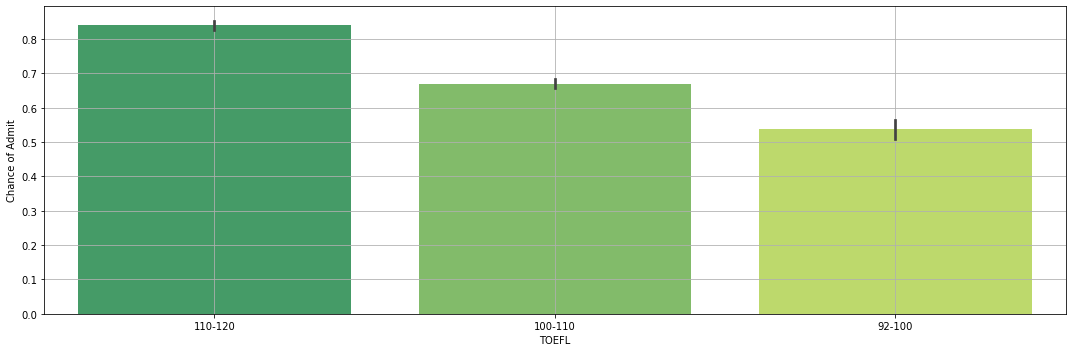

In [18]:
#The students who have scored 110 and above out of 120 have more chances of admission to the Masters program.
plt.figure(figsize=(15,5))
sns.barplot(x='TOEFL',y='Chance of Admit',data=ad,saturation=0.9,palette ="summer")
plt.tight_layout()
plt.grid(True)
plt.show()

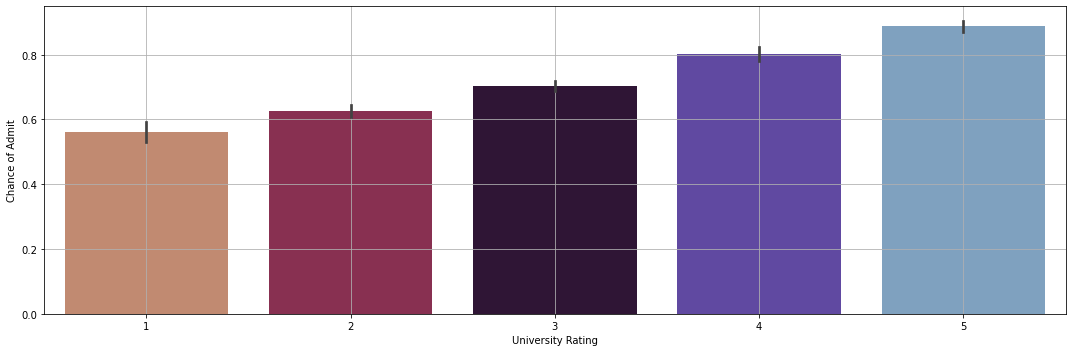

In [19]:
#Higher the rating of the university they studied in, more is the chance to secure a position in Masters program.
plt.figure(figsize=(15,5))
sns.barplot(x='University Rating',y='Chance of Admit',data=ad,palette = "twilight_r",saturation=0.9)
plt.tight_layout()
plt.grid(True)
plt.show()

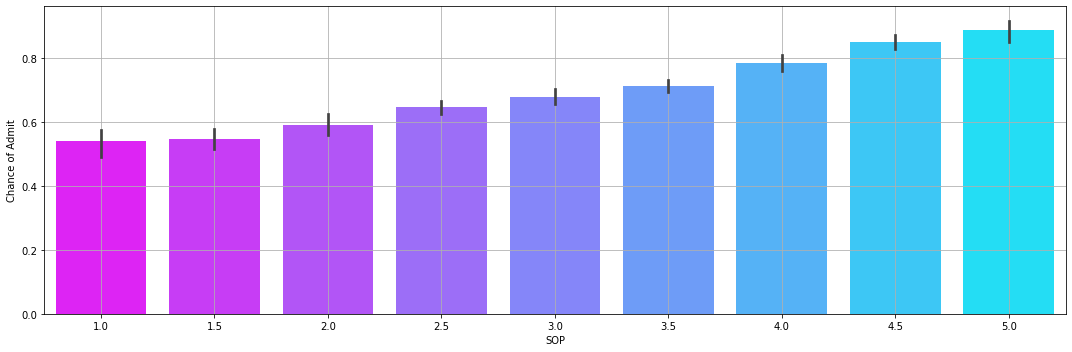

In [20]:
#Stronger their statement of purpose, higher the chances so admission.

plt.figure(figsize=(15,5))
sns.barplot(x='SOP',y='Chance of Admit',data=ad,saturation=0.9,palette = "cool_r")
plt.tight_layout()
plt.grid(True)
plt.show()

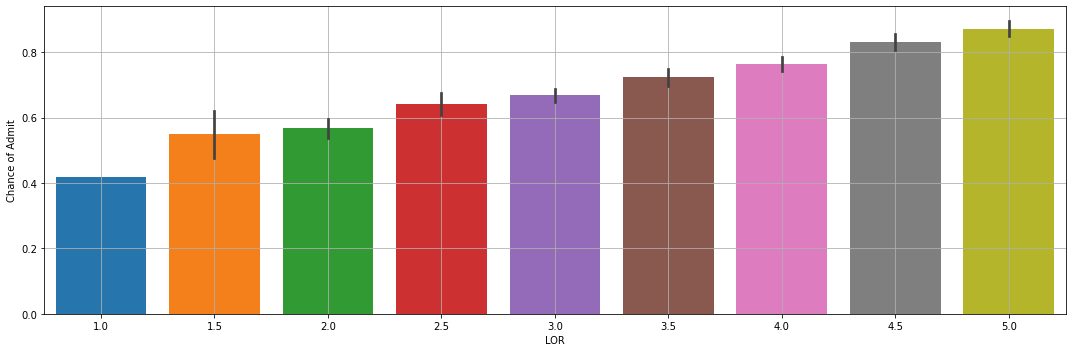

In [21]:
#More better is their letter of recommendation, higher the chances of admission.

plt.figure(figsize=(15,5))
sns.barplot(x='LOR',y='Chance of Admit',data=ad,saturation=0.9)
plt.tight_layout()
plt.grid(True)
plt.show()

<AxesSubplot:xlabel='Research', ylabel='Chance of Admit'>

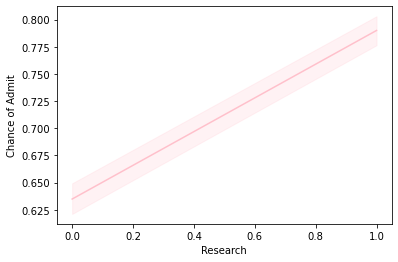

In [22]:
# A positive linear relationship is exhibited between research experience and chances of admit.
sns.lineplot(x='Research', y='Chance of Admit', data= ad, color='pink')

Text(0, 0.5, 'Chance of Admit')

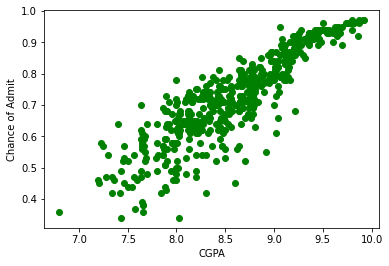

In [23]:
#Higher their CGPA, greater is the chances of getting admitted to the masters Program.

plt.scatter(ad['CGPA'],ad['Chance of Admit'],c='green')
plt.xlabel("CGPA")
plt.ylabel("Chance of Admit")

<AxesSubplot:>

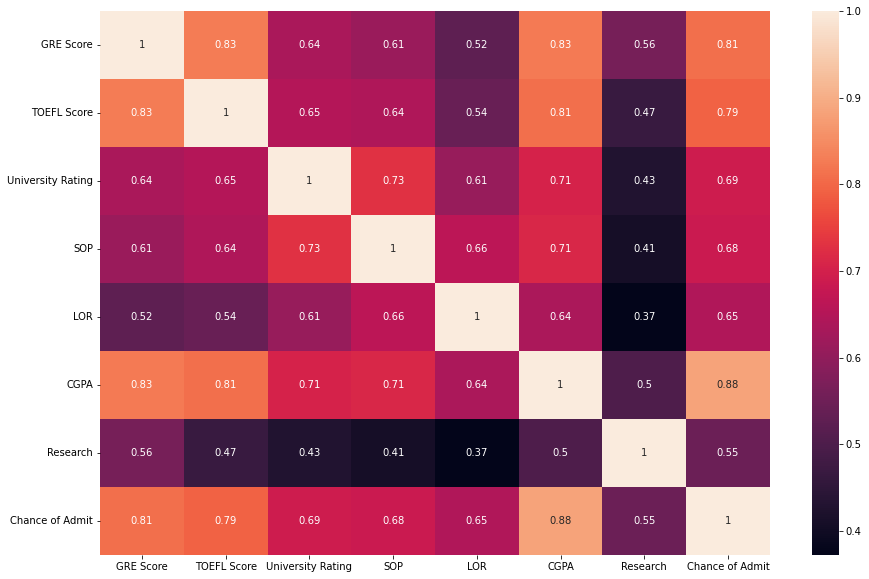

In [24]:
plt.figure(figsize=(15,10))
sns.heatmap(ad.corr(),annot=True)

# Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
ad

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,GRE,TOEFL
0,337,118,4,4.5,4.5,9.65,1,0.92,330-340,110-120
1,324,107,4,4.0,4.5,8.87,1,0.76,320-330,100-110
2,316,104,3,3.0,3.5,8.00,1,0.72,310-320,100-110
3,322,110,3,3.5,2.5,8.67,1,0.80,320-330,110-120
4,314,103,2,2.0,3.0,8.21,0,0.65,310-320,100-110
...,...,...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87,330-340,100-110
496,337,117,5,5.0,5.0,9.87,1,0.96,330-340,110-120
497,330,120,5,4.5,5.0,9.56,1,0.93,330-340,110-120
498,312,103,4,4.0,5.0,8.43,0,0.73,310-320,100-110


In [27]:
# will drop the bins created for visualisation purpose.
ad.drop(['GRE','TOEFL'],axis = 1,inplace = True)

In [28]:
# Keeping the target variable in y, while the predictor variables are in x.
x = ad.drop(['Chance of Admit'],axis=1)
y = ad['Chance of Admit']
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [29]:
#we use test values after the model is trained, it shud not be exposed to the values of trained features
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [30]:
x_train.shape

(400, 7)

In [31]:
y_train.shape

(400,)

In [32]:
x_test.shape

(100, 7)

In [33]:
y_test.shape

(100,)

# Standardisation

In [34]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler

StandardScaler()

In [35]:
 #train independent variables
x_train = scaler.fit_transform(x_train)
x_train 

array([[ 0.38998634,  0.6024183 , -0.09829757, ...,  0.56498381,
         0.4150183 ,  0.89543386],
       [-0.06640493,  0.6024183 ,  0.7754586 , ...,  1.65149114,
        -0.06785154, -1.11677706],
       [-1.25302222, -0.87691722, -0.09829757, ..., -0.52152352,
        -0.13445427, -1.11677706],
       ...,
       [-1.34430047, -1.37002906, -1.8458099 , ..., -1.60803084,
        -2.2157898 , -1.11677706],
       [-0.7053527 , -0.38380538, -0.97205374, ...,  0.56498381,
        -1.49981038, -1.11677706],
       [-0.24896144, -0.21943477, -0.97205374, ...,  0.02173015,
        -0.55072138, -1.11677706]])

In [36]:
##TEST independent variables
#only transform in test to avoid data leakage 
#(only techniques shud be known about train data, not the features and data shud not be leaked to test data)
x_test = scaler.transform(x_test)
x_test

array([[ 1.57660363,  1.42427137,  0.7754586 ,  0.63397891,  0.02173015,
         1.59721688,  0.89543386],
       [-0.24896144,  0.10930646,  0.7754586 ,  1.14116204,  0.56498381,
         0.76468267,  0.89543386],
       [-0.15768318, -0.38380538, -0.97205374, -1.39475361, -1.06477718,
        -1.54976243, -1.11677706],
       [-0.43151794,  0.27367707, -0.09829757, -0.38038735, -0.52152352,
         0.18190872, -1.11677706],
       [ 0.8463776 ,  0.76678891, -0.09829757,  0.12679578, -0.52152352,
         0.78133336,  0.89543386],
       [ 1.12021236,  0.6024183 ,  0.7754586 ,  1.14116204,  0.56498381,
         1.08104567,  0.89543386],
       [-2.43963951, -1.20565845, -1.8458099 , -1.90193674, -1.60803084,
        -1.69961859, -1.11677706],
       [-1.43557873, -0.21943477,  0.7754586 , -0.88757048, -0.52152352,
        -0.18440633, -1.11677706],
       [ 0.11615158,  0.27367707, -0.09829757,  0.12679578,  0.56498381,
         1.06439499,  0.89543386],
       [ 0.29870808,  0.7667

# Model Building

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

In [38]:
#to combine all results at the end
Report = []

# Bagging Regressor

In [39]:
#fitting the model
param_grid = {'base_estimator': [LinearRegression(), DecisionTreeRegressor()],
          'n_estimators': [10,50,100,200,300],
          'max_samples': [0.5,1.0],
          'max_features': [0.5,1.0]}

model1 = GridSearchCV(estimator = BaggingRegressor(),
                            param_grid=param_grid,
                            cv=5,
                            n_jobs =-1,
                            verbose=1)
                    

model1.fit(x_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=BaggingRegressor(), n_jobs=-1,
             param_grid={'base_estimator': [LinearRegression(),
                                            DecisionTreeRegressor()],
                         'max_features': [0.5, 1.0], 'max_samples': [0.5, 1.0],
                         'n_estimators': [10, 50, 100, 200, 300]},
             verbose=1)

In [40]:
#predicting data
test_pred= model1.predict(x_test)

#r2 score
test_r2Score=metrics.r2_score(y_test,test_pred)
print("Test score is:",test_r2Score)

# Adjusted R2 score 
r = 1- (1-test_r2Score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("Adjusted R2 score :",r)

#Evaluation metrics
Report.append({
        'Model': 'Bagging Regressor',
        'Testing Accuracy':test_r2Score,
    'MSE_TEST':mean_squared_error(y_test,test_pred),
    'MAE_TEST': mean_absolute_error(y_test,test_pred),
    'RMSE_TEST' : np.sqrt(mean_squared_error(y_test,test_pred)),
     })

Test score is: 0.8183211471428511
Adjusted R2 score : 0.8044977561645897


# Random Forest Regressor

In [41]:
param_grid = {
           'n_estimators':[10,20,30,40,50],
           'max_depth':[2,5,10,15],
           'min_samples_split':[2,5,7,10,15,20,25],
           'min_samples_leaf':[1,2,4,6,8,10],
             }

model2 = GridSearchCV(estimator =RandomForestRegressor(),
                           param_grid=param_grid,
                           cv=5,
                           verbose=1,
                           n_jobs=-1)
model2.fit(x_train,y_train)

Fitting 5 folds for each of 840 candidates, totalling 4200 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4, 6, 8, 10],
                         'min_samples_split': [2, 5, 7, 10, 15, 20, 25],
                         'n_estimators': [10, 20, 30, 40, 50]},
             verbose=1)

In [42]:
#predicting data
test_pred= model2.predict(x_test)

#r2 score
test_r2Score=metrics.r2_score(y_test,test_pred)
print("Test score is:",test_r2Score)

# Adjusted R2 score 
r = 1- (1-test_r2Score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("Adjusted R2 score :",r)

#Evaluation metrics
Report.append({
        'Model': 'Random Forest Regressor',
        'Testing Accuracy':test_r2Score,
    'MSE_TEST':mean_squared_error(y_test,test_pred),
    'MAE_TEST': mean_absolute_error(y_test,test_pred),
    'RMSE_TEST' : np.sqrt(mean_squared_error(y_test,test_pred)),
     })

Test score is: 0.8111152033392346
Adjusted R2 score : 0.7967435340280894


# Voting Regressor

In [43]:
param_grid = {'rf__max_depth':[5,10,15],
               'svr__C':[10,50,100]}

model3 = GridSearchCV(estimator = VotingRegressor(
                                      estimators= [('rf',RandomForestRegressor()),('svr',SVR()),]),
                            param_grid=param_grid,
                            cv=5,
                            n_jobs =-1,
                            verbose=1)
                    

model3.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=VotingRegressor(estimators=[('rf',
                                                    RandomForestRegressor()),
                                                   ('svr', SVR())]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [5, 10, 15], 'svr__C': [10, 50, 100]},
             verbose=1)

In [44]:
#predicting data
test_pred= model3.predict(x_test)

#r2 score
test_r2Score=metrics.r2_score(y_test,test_pred)
print("Test score is:",test_r2Score)

# Adjusted R2 score 
r = 1- (1-test_r2Score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("Adjusted R2 score :",r)

#Evaluation metrics
Report.append({
        'Model': 'Voting Regressor',
        'Testing Accuracy':test_r2Score,
    'MSE_TEST':mean_squared_error(y_test,test_pred),
    'MAE_TEST': mean_absolute_error(y_test,test_pred),
    'RMSE_TEST' : np.sqrt(mean_squared_error(y_test,test_pred)),
     })

Test score is: 0.7836142467218727
Adjusted R2 score : 0.767150113320276


# Extra Trees Regressor

In [45]:
#fitting the model
param_grid ={
    'n_estimators':[5,10,15],
    'criterion':['squared_error'],
    'max_depth': range(2,32,1),
    'min_samples_split':range(2,10,1)}

model4 = GridSearchCV(estimator = ExtraTreesRegressor(),
                            param_grid=param_grid,
                            cv=5,
                            n_jobs =-1,
                            verbose=1)
                    

model4.fit(x_train,y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error'],
                         'max_depth': range(2, 32),
                         'min_samples_split': range(2, 10),
                         'n_estimators': [5, 10, 15]},
             verbose=1)

In [46]:
#predicting data
test_pred= model4.predict(x_test)

#r2 score
test_r2Score=metrics.r2_score(y_test,test_pred)
print("Test score is:",test_r2Score)

# Adjusted R2 score 
r = 1- (1-test_r2Score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("Adjusted R2 score :",r)

#Evaluation metrics
Report.append({
        'Model': 'Extra Trees Regressor',
        'Testing Accuracy':test_r2Score,
    'MSE_TEST':mean_squared_error(y_test,test_pred),
    'MAE_TEST': mean_absolute_error(y_test,test_pred),
    'RMSE_TEST' : np.sqrt(mean_squared_error(y_test,test_pred)),
     })

Test score is: 0.8125517254576582
Adjusted R2 score : 0.79828935674248


# Summing Up the Final Result

In [47]:
Report= pd.DataFrame(Report,columns=['Model','Testing Accuracy','MSE_TEST','MAE_TEST','RMSE_TEST'])
Report.sort_values(by =['Testing Accuracy','MSE_TEST'],ascending=False,inplace=True)
Report

,Model,Testing Accuracy,MSE_TEST,MAE_TEST,RMSE_TEST
0,Bagging Regressor,0.818321,0.003715,0.042672,0.060954
3,Extra Trees Regressor,0.812552,0.003833,0.043815,0.061914
1,Random Forest Regressor,0.811115,0.003863,0.041704,0.062151
2,Voting Regressor,0.783614,0.004425,0.047425,0.066521


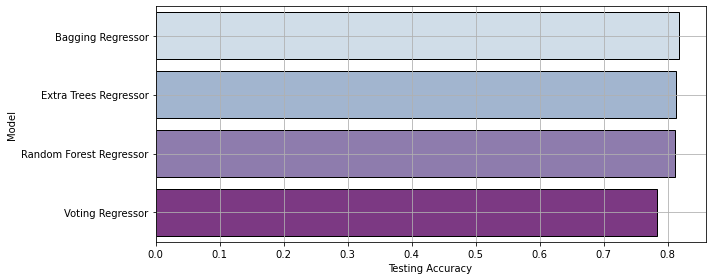

In [48]:
plt.figure(figsize=(10,4))
sns.barplot(y=Report['Model'],x=Report['Testing Accuracy'],palette='BuPu',edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

# The Bagging regressor which is an ensemble meta-estimator took into consideraton algorithms like the mean of Linear Regression and Decision Tree Regressor gave the highest accuracy of 82 per-cent along with the lowest Mean squared error showcasing the fact that its the best model to be used for prediction of students admissions based on the given attributes. 


